## Análise Exploratória de Dados

### Perguntas

Sazonalidade nas vendas

Quais são os produtos mais vendidos?

Quais categorias têm maior volume de vendas?

Relação: Preço x Venda

Quais produtos têm maior e menor taxa de giro de estoque?

Há fornecedores que entregam com mais frequência ou são mais confiáveis?

Existe algum problema de estoque excessivo ou ruptura de estoque?


### Sumário


Product_ID : Identificador exclusivo para cada produto.

Product_Name : Nome do produto.

Catagory : A categoria do produto (por exemplo, grãos e leguminosas, bebidas, frutas e vegetais).

Supplier_ID : Identificador exclusivo para o fornecedor do produto.
Supplier_Name : Nome do fornecedor.

Stock_Quantity : O nível de estoque atual do produto no depósito.

Reorder_Level : O nível de estoque no qual o novo estoque deve ser pedido.

Reorder_Quantity : A quantidade de produto a ser pedida quando o estoque atingir o nível de reposição.

Unit_Price : Preço por unidade do produto.

Date_Received : A data em que o produto foi recebido no depósito.

Last_Order_Date : A última data em que o produto foi pedido.

Expiration_Date : A data de validade do produto, se aplicável.

Warehouse_Location : O endereço do armazém onde o produto está armazenado.

Sales_Volume : O número total de unidades vendidas.

Inventory_Turnover_Rate : A taxa na qual o produto é vendido e reabastecido.

Status : Status atual do produto (por exemplo, Ativo, Descontinuado, Em espera).

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [20]:
df = pd.read_csv("Grocery_Inventory_and_Sales_Dataset.csv")
df.head()

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,$4.50,8/16/2024,6/29/2024,9/19/2024,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,$20.00,11/1/2024,5/29/2024,5/8/2024,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,$6.00,8/3/2024,6/10/2024,9/22/2024,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,$1.50,12/8/2024,2/19/2025,4/17/2024,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,$4.00,7/3/2024,10/11/2024,10/5/2024,15068 Scoville Court,62,25,Backordered


### Verificação e Tratamento dos dados

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               990 non-null    object
 1   Product_Name             990 non-null    object
 2   Catagory                 989 non-null    object
 3   Supplier_ID              990 non-null    object
 4   Supplier_Name            990 non-null    object
 5   Stock_Quantity           990 non-null    int64 
 6   Reorder_Level            990 non-null    int64 
 7   Reorder_Quantity         990 non-null    int64 
 8   Unit_Price               990 non-null    object
 9   Date_Received            990 non-null    object
 10  Last_Order_Date          990 non-null    object
 11  Expiration_Date          990 non-null    object
 12  Warehouse_Location       990 non-null    object
 13  Sales_Volume             990 non-null    int64 
 14  Inventory_Turnover_Rate  990 non-null    i

In [22]:
df['Unit_Price'] = df['Unit_Price'].replace(r'[\$,]', '', regex=True).astype(float)
df['Unit_Price'].dtype

dtype('float64')

In [23]:
# Renomeando "Catagory" para Category
df.rename({'Catagory' : 'Category'}, axis = 1, inplace = True)

In [24]:
# Verificar valores ausentes
print(df.isnull().sum())

# Verificar valores únicos em colunas importantes
print(df['Category'].unique())

Product_ID                 0
Product_Name               0
Category                   1
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64
['Grains & Pulses' 'Beverages' 'Fruits & Vegetables' 'Oils & Fats' 'Dairy'
 'Bakery' 'Seafood' nan]


In [25]:
# Filtrar o dataframe onde a categoria está NaN
df_nan_categoria = df[df['Category'].isna()]

# Exibir as informações desse(s) produto(s)
df_nan_categoria

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
685,10-378-9729,Cabbage,NaN,83-941-9620,Rooxo,69,21,68,66.55,12/23/2024,11/26/2024,9/21/2024,2 Butterfield Pass,36,35,Discontinued


In [26]:
# Substituir NaN para o produto "Cabbage" com a categoria correta
df.loc[df['Product_Name'] == 'Cabbage', 'Category'] = 'Fruits & Vegetables'

# Verificar se a correção foi aplicada
df[df['Product_Name'] == 'Cabbage']

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
23,67-025-1245,Cabbage,Fruits & Vegetables,28-575-0716,Chatterbridge,88,46,55,1.00,4/9/2024,3/6/2024,8/12/2024,51890 Lindbergh Terrace,73,63,Active
501,21-013-3508,Cabbage,Fruits & Vegetables,64-489-8494,Meevee,12,95,49,1.00,6/9/2024,6/13/2024,11/10/2024,84305 Fair Oaks Plaza,25,23,Backordered
521,79-428-8753,Cabbage,Fruits & Vegetables,29-521-7910,Skivee,62,79,95,1.00,5/16/2024,7/6/2024,12/30/2024,9 Holmberg Circle,34,12,Active
652,45-380-4627,Cabbage,Fruits & Vegetables,20-201-5639,Zoombox,90,1,40,0.90,10/20/2024,1/11/2025,2/16/2025,0 Thackeray Point,52,19,Discontinued
685,10-378-9729,Cabbage,Fruits & Vegetables,83-941-9620,Rooxo,69,21,68,66.55,12/23/2024,11/26/2024,9/21/2024,2 Butterfield Pass,36,35,Discontinued
788,75-927-9108,Cabbage,Fruits & Vegetables,27-406-7972,Topdrive,24,32,17,1.00,9/29/2024,6/17/2024,7/2/2024,43 Washington Street,55,72,Discontinued
806,82-538-4809,Cabbage,Fruits & Vegetables,74-357-2990,Twitternation,83,61,4,1.00,9/16/2024,11/5/2024,10/24/2024,700 Northland Crossing,35,7,Backordered
987,31-745-6850,Cabbage,Fruits & Vegetables,96-215-2767,Lajo,94,90,12,0.90,10/3/2024,10/24/2024,11/1/2024,081 Jana Lane,98,71,Active


### Sazonalidade nas Vendas

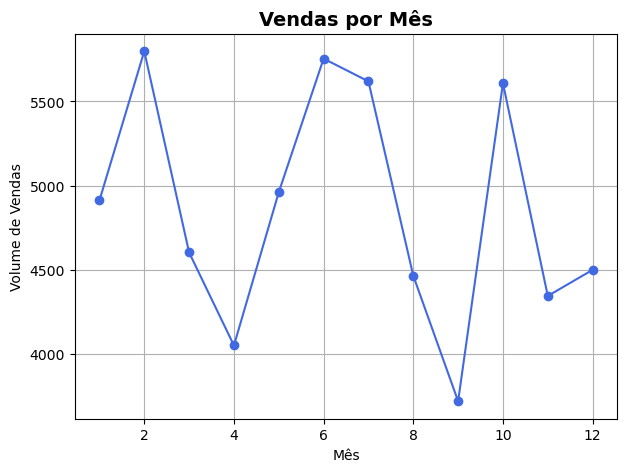

In [27]:
# Converter datas para datetime
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Criar uma nova coluna para o mês
df['Mes_Pedido'] = df['Last_Order_Date'].dt.month

# Analisar a sazonalidade das vendas por mês
vendas_por_mes = df.groupby('Mes_Pedido')['Sales_Volume'].sum()

# Criar o gráfico
plt.figure(figsize=(7,5))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o', linestyle='-', color='royalblue')

plt.title("Vendas por Mês", fontsize=14, fontweight='bold')
plt.xlabel("Mês")
plt.ylabel("Volume de Vendas")
plt.grid(True)

plt.show()


### Quais são os produtos mais vendidos?

In [28]:
prod_vendidos = df.groupby('Product_Name')['Sales_Volume'].sum().sort_values(ascending=False)
prod_vendidos.head(10).to_frame().style.background_gradient(cmap="Blues")

,Sales_Volume
Product_Name,
Bread Flour,1002
Pomegranate,972
Cauliflower,911
Haddock,892
Arabica Coffee,874
Jasmine Rice,794
Egg (Goose),770
Grapes,757
Black Rice,737


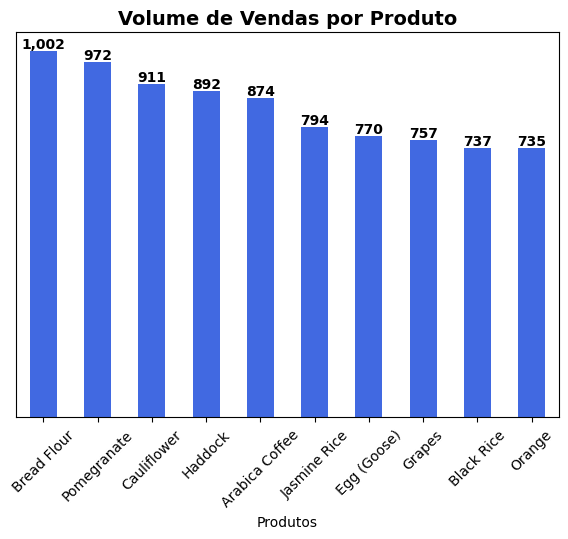

In [29]:
# Criar o gráfico de barras
plt.figure(figsize=(7,5))
ax = prod_vendidos.head(10).plot(kind='bar', color='royalblue')

# Personalização do gráfico
plt.title("Volume de Vendas por Produto", fontsize=14, fontweight='bold')
plt.xlabel("Produtos", fontsize=10)
plt.ylabel("")  # Remove o rótulo do eixo Y
plt.xticks(rotation=45)

# Adicionar rótulos no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formato do número (sem casas decimais e separador de milhar)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição do texto
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Remover os valores do eixo Y
ax.yaxis.set_visible(False)

plt.grid(axis="y", alpha=0.7)

# Mostrar o gráfico
plt.show()

### Quais categorias têm maior volume de vendas?

In [30]:
categorias_vendas = df.groupby('Category')['Sales_Volume'].sum().sort_values(ascending=False)
categorias_vendas.head(5).to_frame().style.background_gradient(cmap="Blues")

,Sales_Volume
Category,
Fruits & Vegetables,19397
Dairy,10772
Grains & Pulses,8886
Seafood,5578
Oils & Fats,4606


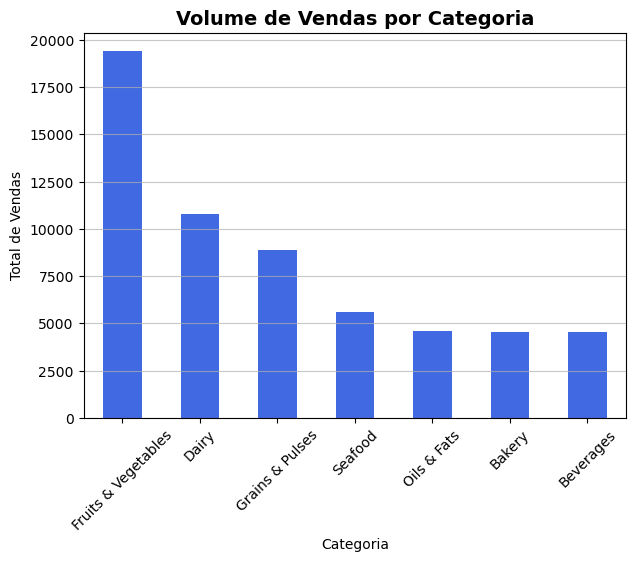

In [31]:
# Criar o gráfico de barras
plt.figure(figsize=(7,5))
categorias_vendas.plot(kind='bar', color='royalblue')

# Personalização do gráfico
plt.title("Volume de Vendas por Categoria", fontsize=14, fontweight='bold')
plt.xlabel("Categoria", fontsize=10)
plt.ylabel("Total de Vendas", fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.7)

# Mostrar o gráfico
plt.show()

### Relação: Preço x Venda

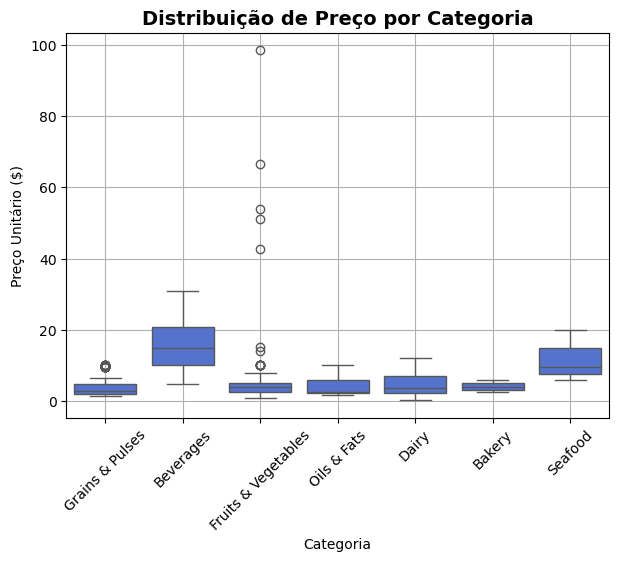

In [32]:
# Criar o boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Category', y='Unit_Price', color='royalblue')

plt.title("Distribuição de Preço por Categoria", fontsize=14, fontweight='bold')
plt.xlabel("Categoria")
plt.ylabel("Preço Unitário ($)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


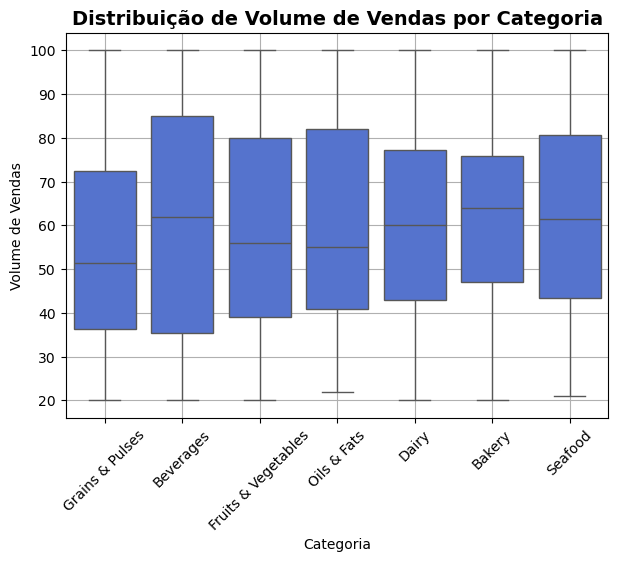

In [33]:
# Criar o boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Category', y='Sales_Volume', color='royalblue')

plt.title("Distribuição de Volume de Vendas por Categoria", fontsize=14, fontweight='bold')
plt.xlabel("Categoria")
plt.ylabel("Volume de Vendas")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

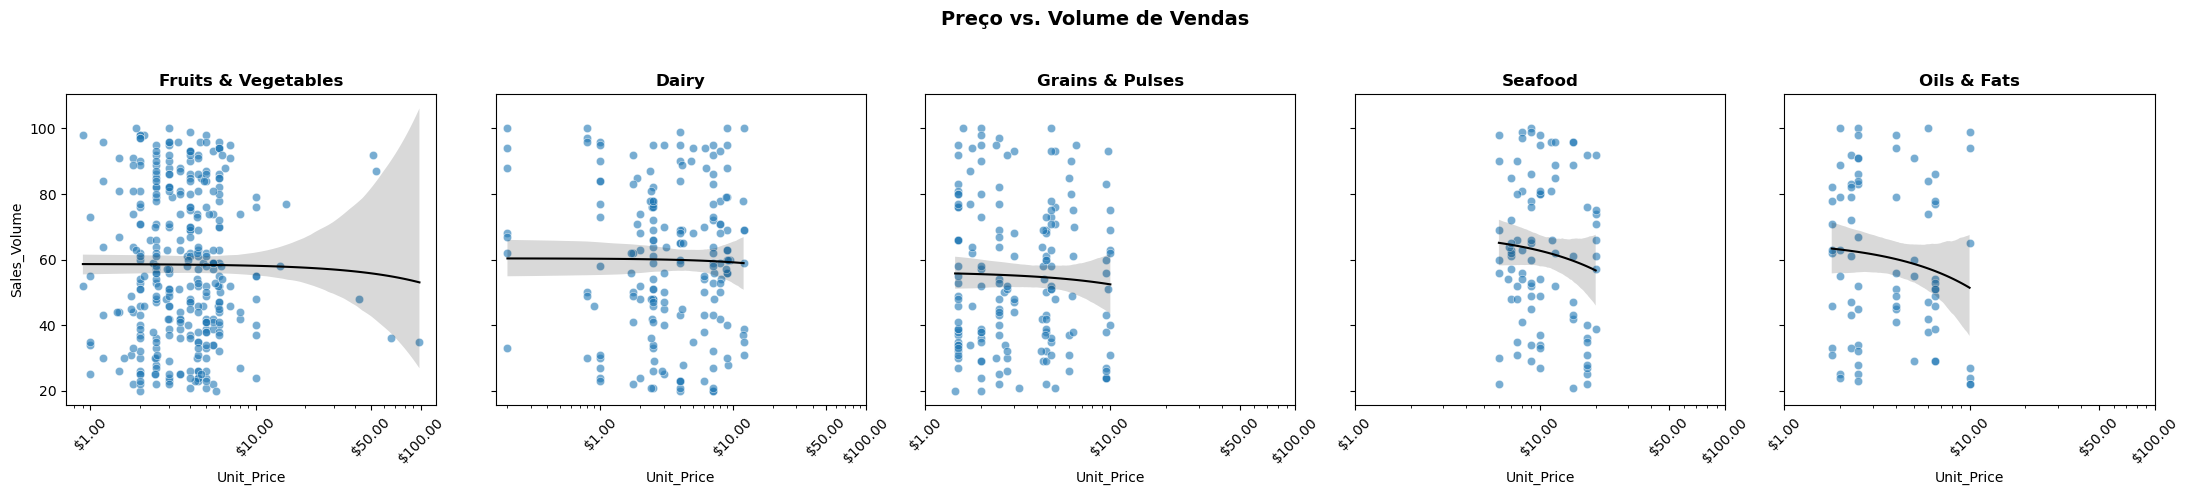

In [34]:
# Selecionar as 5 categorias com maior volume de vendas
top_categorias = df.groupby('Category')['Sales_Volume'].sum().nlargest(5).index

# Criar gráfico de dispersão para cada categoria
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 5), sharey=True)

for ax, categoria in zip(axes, top_categorias):
    df_categoria = df[df['Category'] == categoria]

    # Criar scatterplot
    sns.scatterplot(data=df_categoria, x='Unit_Price', y='Sales_Volume', alpha=0.6, ax=ax)

    # Adicionar linha de tendência mais destacada
    sns.regplot(data=df_categoria, x='Unit_Price', y='Sales_Volume', scatter=False, color='black',
                line_kws={"linewidth": 1.5}, ax=ax)

    # Ajustar título e escala logarítmica do eixo X
    ax.set_title(categoria, fontsize=12, fontweight='bold')
    ax.set_xscale('log')

    # Melhorar a formatação dos rótulos do eixo X
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
    ax.set_xticks([1, 10, 50, 100])  # Menos valores no eixo para evitar poluição
    ax.tick_params(axis='x', rotation=45)  # Melhorar visualização

# Ajustar layout geral
plt.suptitle("Preço vs. Volume de Vendas", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Evitar sobreposição do título

plt.show()


### Quais produtos têm maior e menor taxa de giro de estoque?

Maiores taxas - Produtos Ativos

In [35]:
#Filtrando Somente os produtos com Status 'Ativo'
top_giro = df[df['Status'] == 'Active'][['Product_Name', 'Supplier_Name', 'Inventory_Turnover_Rate', 'Unit_Price', 'Sales_Volume']]\
    .sort_values(by='Inventory_Turnover_Rate', ascending=False)

top_giro.head(10).style.background_gradient(cmap="Blues")

,Product_Name,Supplier_Name,Inventory_Turnover_Rate,Unit_Price,Sales_Volume
268,Tilapia,InnoZ,100,7.000000,63
748,Black Tea,Jaloo,100,5.300000,65
664,Wild Rice,Topdrive,100,10.000000,62
80,Butter Biscuit,Ozu,100,6.000000,67
786,Egg (Turkey),Katz,100,2.350000,78
73,Bell Pepper,Tagtune,100,4.450000,74
648,Short Grain Rice,Quatz,100,3.000000,48
3,Long Grain Rice,Brightbean,99,1.500000,95
146,Green Tea,Oyoyo,99,8.000000,93
102,Cottage Cheese,Midel,99,5.000000,68


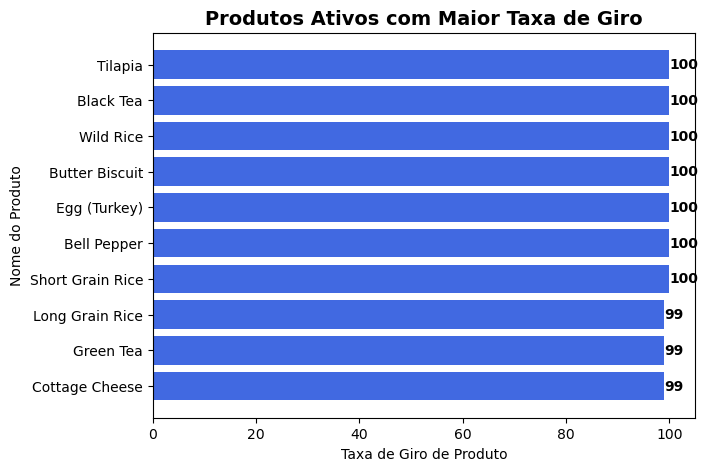

In [36]:
# Selecionando os 10 produtos com maior taxa de giro
top_10_giro = top_giro.head(10)

# Criando o gráfico de barras horizontal
plt.figure(figsize=(7, 5))
bars = plt.barh(top_10_giro['Product_Name'], top_10_giro['Inventory_Turnover_Rate'], color='royalblue')

# Adicionando os rótulos em cima das barras
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', fontsize=10, fontweight='bold')

# Definindo os títulos e os rótulos dos eixos
plt.xlabel('Taxa de Giro de Produto', fontsize=10)
plt.ylabel('Nome do Produto', fontsize=10)
plt.title('Produtos Ativos com Maior Taxa de Giro', fontsize=14, fontweight='bold')

# Invertendo o eixo Y para que o maior valor esteja no topo
plt.gca().invert_yaxis()

# Exibindo o gráfico
plt.show()

Menores Taxas - Produtos Ativos

In [37]:
# Filtrando somente os produtos com Status 'Active' e ordenando de baixo para cima
top_giro = df[df['Status'] == 'Active'][['Product_Name', 'Supplier_Name', 'Inventory_Turnover_Rate', 'Unit_Price', 'Sales_Volume']]\
    .sort_values(by='Inventory_Turnover_Rate', ascending=False)

# Exibindo os 10 últimos produtos com a taxa de giro mais baixa
top_giro.tail(10).style.background_gradient(cmap="Blues_r")

,Product_Name,Supplier_Name,Inventory_Turnover_Rate,Unit_Price,Sales_Volume
13,Plum,Voomm,5,4.000000,69
434,White Sugar,Topicshots,4,2.000000,57
139,Sour Cream,Skyvu,4,4.000000,84
425,Black Coffee,Youfeed,4,15.000000,89
462,Corn Oil,Twinte,3,2.500000,34
56,Sourdough Bread,Vinte,3,4.500000,32
35,Onion,Skyble,2,2.000000,60
870,Arabica Coffee,Zoozzy,2,20.500000,62
105,Lemon,Mydo,2,2.500000,56
825,Mushrooms,Bluezoom,2,6.300000,54


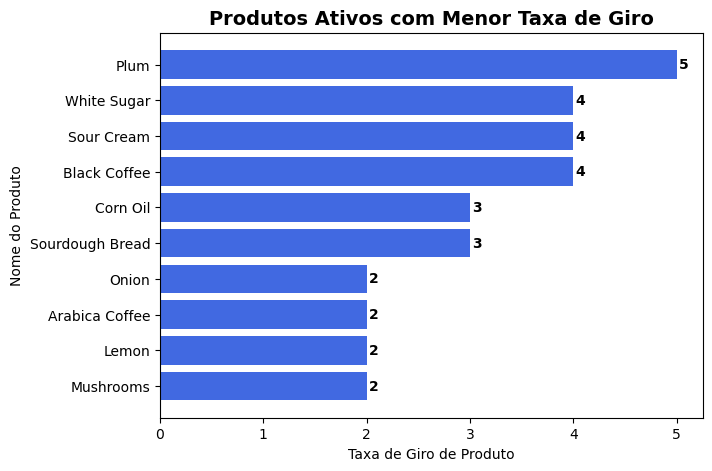

In [38]:
# Selecionando os 10 produtos com maior taxa de giro
bot_10_giro = top_giro.tail(10)

# Criando o gráfico de barras horizontal
plt.figure(figsize=(7, 5))
bars = plt.barh(bot_10_giro['Product_Name'], bot_10_giro['Inventory_Turnover_Rate'], color='royalblue')

# Adicionando os rótulos em cima das barras
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', fontsize=10, fontweight='bold')

# Definindo os títulos e os rótulos dos eixos
plt.xlabel('Taxa de Giro de Produto', fontsize=10)
plt.ylabel('Nome do Produto', fontsize=10)
plt.title('Produtos Ativos com Menor Taxa de Giro', fontsize=14, fontweight='bold')

# Invertendo o eixo Y para que o maior valor esteja no topo
plt.gca().invert_yaxis()

# Exibindo o gráfico
plt.show()

Verificando produtos descontinuados

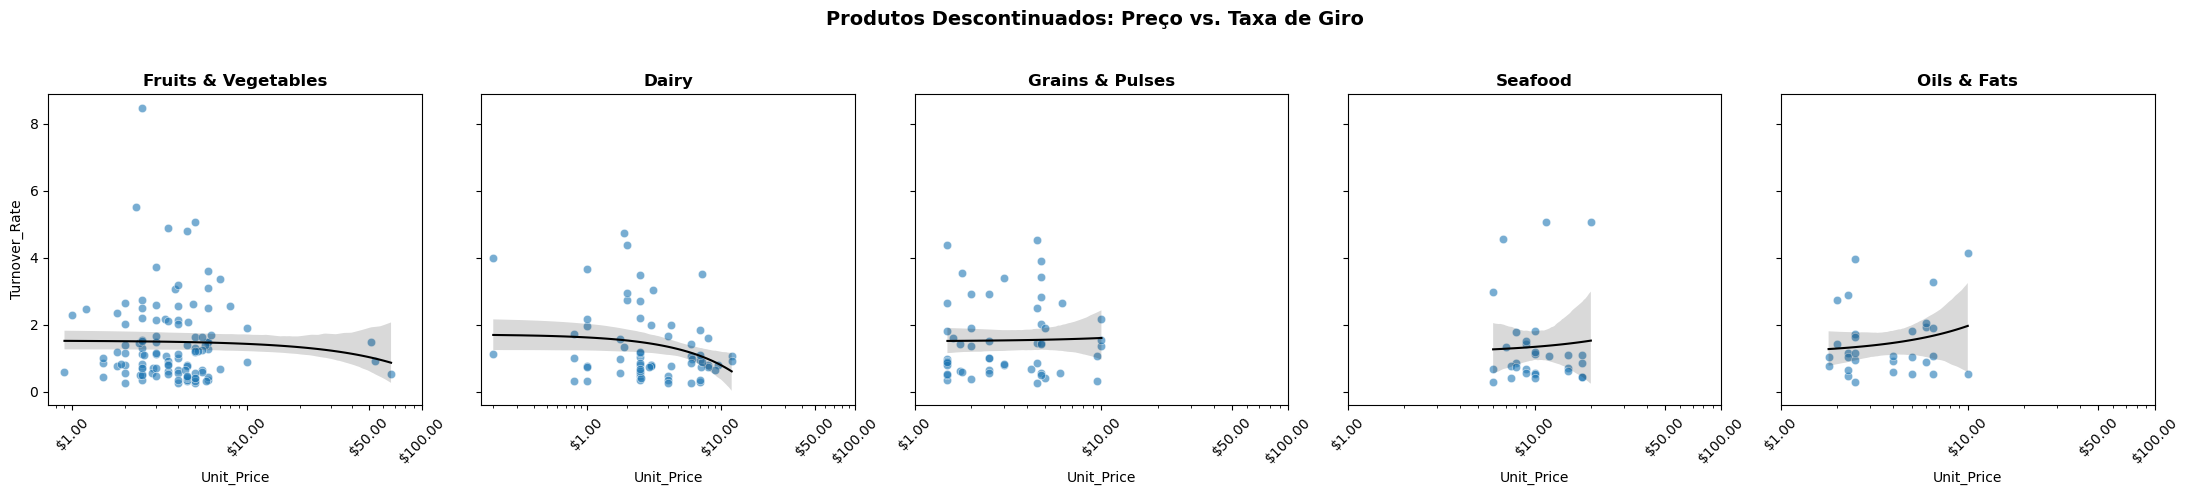

In [39]:
# Filtrar apenas produtos descontinuados
df_discontinued = df[df['Status'] == 'Discontinued'].copy()

# Calcular a taxa de giro (evitando divisão por zero)
df_discontinued['Turnover_Rate'] = df_discontinued['Sales_Volume'] / df_discontinued['Stock_Quantity']
df_discontinued = df_discontinued.replace([float('inf'), -float('inf')], 0)  # Tratando valores infinitos

# Selecionar as 5 categorias com maior volume de vendas
top_categorias = df.groupby('Category')['Sales_Volume'].sum().nlargest(5).index

# Criar gráfico de dispersão para cada categoria
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 5), sharey=True)

for ax, categoria in zip(axes, top_categorias):
    df_categoria = df_discontinued[df_discontinued['Category'] == categoria]

    # Criar scatterplot
    sns.scatterplot(data=df_categoria, x='Unit_Price', y='Turnover_Rate', alpha=0.6, ax=ax)

    # Adicionar linha de tendência mais destacada
    sns.regplot(data=df_categoria, x='Unit_Price', y='Turnover_Rate', scatter=False, color='black',
                line_kws={"linewidth": 1.5}, ax=ax)

    # Ajustar título e escala logarítmica do eixo X
    ax.set_title(categoria, fontsize=12, fontweight='bold')
    ax.set_xscale('log')

    # Melhorar a formatação dos rótulos do eixo X
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
    ax.set_xticks([1, 10, 50, 100])  # Menos valores no eixo para evitar poluição
    ax.tick_params(axis='x', rotation=45)  # Melhorar visualização

# Ajustar layout geral
plt.suptitle("Produtos Descontinuados: Preço vs. Taxa de Giro", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Evitar sobreposição do título

plt.show()

In [40]:
#Filtrando Somente os produtos com Status 'Discontinued'
discont_prod = df[df['Status'] == 'Discontinued'][['Product_Name', 'Supplier_Name', 'Inventory_Turnover_Rate', 'Unit_Price', 'Sales_Volume']]\
    .sort_values(by='Inventory_Turnover_Rate', ascending=False)

discont_prod.head(10).style.background_gradient(cmap="Blues")

,Product_Name,Supplier_Name,Inventory_Turnover_Rate,Unit_Price,Sales_Volume
671,Egg (Goose),Einti,100,2.500000,54
908,Cucumber,Youbridge,100,1.800000,89
641,Kiwi,Vitz,100,5.800000,20
338,Zucchini,Trudeo,100,2.500000,36
572,Egg (Duck),Dynazzy,100,1.000000,30
342,Rye Bread,Kwilith,100,3.000000,70
172,Robusta Coffee,Photofeed,97,10.000000,62
537,Cauliflower,Realpoint,97,2.550000,52
82,Cream,Oyondu,96,2.500000,72
539,Pineapple,Gigashots,96,3.500000,88


### Há fornecedores que entregam com mais frequência?

In [41]:
# Calcular a diferença em dias entre o último pedido e a data de recebimento
df['Last_Order_to_Received'] = (pd.to_datetime(df['Date_Received']) - pd.to_datetime(df['Last_Order_Date'])).dt.days

# Filtrar registros com valores negativos de frequência de entrega
df = df[df['Last_Order_to_Received'] >= 0]

# Agrupar por Supplier_ID e calcular a média da frequência de entrega (em dias) e o estoque médio
fornecedor_analise = df.groupby('Supplier_Name').agg(
    media_frequencia_entrega=('Last_Order_to_Received', 'mean'),
    estoque_medio=('Stock_Quantity', 'mean'),
    nivel_reposicao_medio=('Reorder_Level', 'mean'),
    quantidade_reposicao_media=('Reorder_Quantity', 'mean'),
).reset_index()

# Ordenar fornecedores pela média de frequência de entrega (menor é mais frequente)
fornecedor_analise = fornecedor_analise.sort_values(by='media_frequencia_entrega')

# Visualizar
fornecedor_analise

,Supplier_Name,media_frequencia_entrega,estoque_medio,nivel_reposicao_medio,quantidade_reposicao_media
107,Kwinu,2.0,24.0,25.0,52.0
180,Skippad,3.0,99.0,8.0,27.0
171,Skajo,3.0,99.0,96.0,39.0
155,Realfire,6.0,10.0,17.0,70.0
96,Jetpulse,8.0,64.0,11.0,97.0
...,...,...,...,...,...
163,Rhyzio,319.0,42.0,69.0,54.0
132,Ntags,324.0,12.0,60.0,73.0
117,Meejo,335.0,93.0,68.0,71.0
137,Oyoba,335.0,21.0,28.0,72.0


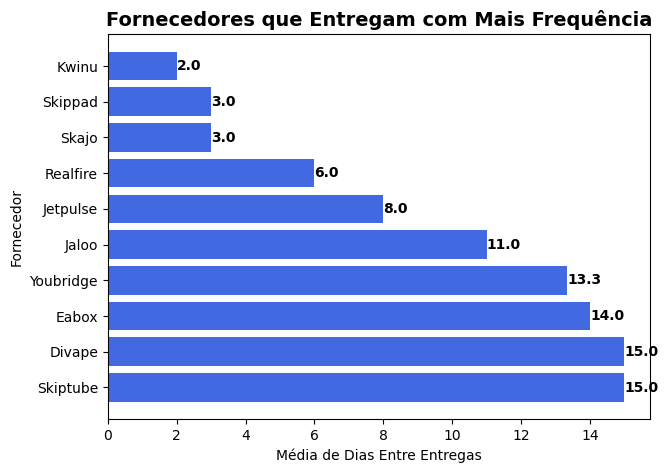

In [42]:
# Definir o número de fornecedores a serem exibidos (os mais frequentes)
top_n = 10  # Ajuste conforme necessário
top_fornecedores = fornecedor_analise.nsmallest(top_n, 'media_frequencia_entrega')

# Criar o gráfico de barras horizontal
plt.figure(figsize=(7,5))
plt.barh(top_fornecedores['Supplier_Name'], top_fornecedores['media_frequencia_entrega'], color='royalblue')
plt.xlabel('Média de Dias Entre Entregas')
plt.ylabel('Fornecedor')
plt.title('Fornecedores que Entregam com Mais Frequência', fontsize=14, fontweight='bold')

# Inverter o eixo Y para que o fornecedor mais frequente fique no topo
plt.gca().invert_yaxis()

# Adicionar rótulos nos valores das barras
for index, value in enumerate(top_fornecedores['media_frequencia_entrega']):
    plt.text(value, index, f"{value:.1f}", va='center', fontsize=10, color='black', fontweight='bold')

plt.show()

### Existe algum problema de estoque excessivo ou ruptura de estoque?

In [43]:
# Criar colunas para identificar excesso e ruptura de estoque
df['Excesso_Estoque'] = df['Stock_Quantity'] > (2 * df['Reorder_Level'])
df['Ruptura_Estoque'] = df['Stock_Quantity'] < df['Reorder_Level']

# Contar quantos produtos estão em cada situação
excesso_count = df['Excesso_Estoque'].sum()
ruptura_count = df['Ruptura_Estoque'].sum()
total_produtos = len(df)

print(f"Produtos com excesso de estoque: {excesso_count} ({(excesso_count/total_produtos)*100:.2f}%)")
print(f"Produtos com ruptura de estoque: {ruptura_count} ({(ruptura_count/total_produtos)*100:.2f}%)")


Produtos com excesso de estoque: 121 (25.42%)
Produtos com ruptura de estoque: 212 (44.54%)


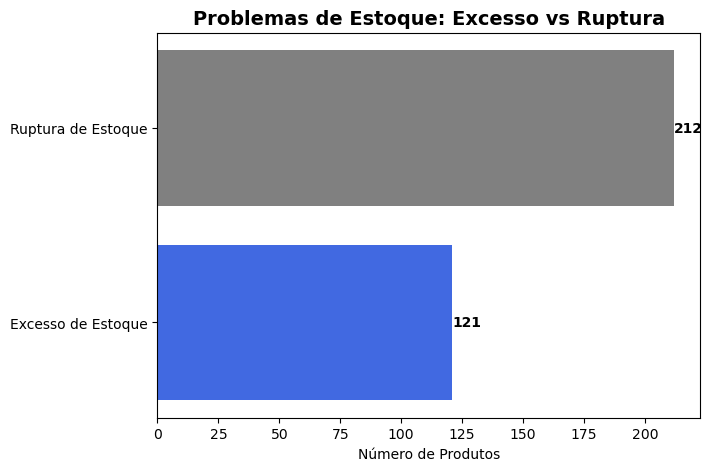

In [44]:
# Criar os dados do gráfico
problemas = ['Excesso de Estoque', 'Ruptura de Estoque']
quantidades = [excesso_count, ruptura_count]

# Criar gráfico de barras
plt.figure(figsize=(7,5))
plt.barh(problemas, quantidades, color=['royalblue', 'gray'])
plt.xlabel("Número de Produtos")
plt.title("Problemas de Estoque: Excesso vs Ruptura", fontsize=14, fontweight='bold')

# Adicionar os valores nas barras
for index, value in enumerate(quantidades):
    plt.text(value, index, str(value), va='center', fontsize=10, fontweight='bold')

plt.show()

Produtos com excesso de estoque

In [45]:
# Filtrar produtos ativos com excesso de estoque
df_excesso = df[(df['Status'] == 'Active') & (df['Stock_Quantity'] >= 2 * df['Reorder_Level'])][['Product_Name', 'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Sales_Volume', 'Inventory_Turnover_Rate']] \
    .sort_values(by='Stock_Quantity', ascending=False)
df_excesso.head().style.background_gradient(cmap="Blues")


,Product_Name,Supplier_Name,Stock_Quantity,Reorder_Level,Sales_Volume,Inventory_Turnover_Rate
457,Chocolate Biscuit,Yodo,100,1,47,79
855,Onion,Voolia,98,40,46,9
877,Wild Rice,Yoveo,98,30,31,26
364,Long Grain Rice,Meevee,98,40,30,53
949,Canola Oil,Thoughtmix,97,32,82,98


Produtos com ruptura de estoque

In [46]:
# Filtrar produtos com ruptura de estoque
df_ruptura = df[(df['Status'] == 'Active') & (df['Stock_Quantity'] <= df['Reorder_Level'])][['Product_Name', 'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Sales_Volume', 'Inventory_Turnover_Rate']] \
    .sort_values(by='Stock_Quantity', ascending=True)
df_ruptura.head().style.background_gradient(cmap="Blues")

,Product_Name,Supplier_Name,Stock_Quantity,Reorder_Level,Sales_Volume,Inventory_Turnover_Rate
618,Basmati Rice,Yodo,11,87,29,6
780,Haddock,Eire,11,87,86,91
329,White Sugar,Skyba,14,16,39,30
828,Pineapple,Rhyloo,14,81,74,84
626,Onion,Voolith,16,75,22,46
